# Analysis of the stackoverflow survey 2020 dataset.

### Table of contents

* [Data understanding](#part1)
    * [EDA](#eda)
* [Data Cleaning and Feature Engineering](#cleaning)
    * [Developer types](#devtypes)
    * [Age](#age)
    * [Years and age of active Coding](#years)
    * [Country and region](#country)
    * [Gender](#gender)
    * [Started Coding over 30 years](#over30)
* [Business Understanding](#biz)
    * [Question 1: Are you too old to learn to code?](#q1)
    * [Question 2: What factors contribute to starting late to code?](#q2)
    * [Question 3: What are the subtle or obvious consequences common with late adopters of the coding lifestyle?](#q3)

#### Installation

Python is required to run the code. The basic packages that come woth the Anaconda distribution are sufficient for this project. All python files are created and run in a Jupyter notebook.

#### Motivation

From this dataset, I set out to answer 3 questions.

    1. Can someone be too old to learn coding?
    2. What are some factors that contribute to starting late to code?
    3. What are some common effects of people who started coding late (from 30 years old)


#### File description

This notebook contains a summary of the entire workflow to understand, clean and analyse the data in order to answer the questions above.

The datasets used here are both available within the folder. These datasets are 'survey_results_public.csv' (from stackoverflow website) and 'countries regions2.csv'.

As part of [this github repository](https://github.com/suemnjeri/stackoverflow2020), other notebooks (part 1 to part 4) are available that are more detailed in analysis and cleaning, as noted in the repository's readme file.

#### Results

The results and visualizations are well documented in [this medium post.](https://towardsdatascience.com/this-data-answers-the-am-i-too-old-to-learn-coding-timeless-question-70deba5d294f)

#### Licensing, Authors, Acknowledgements

This project was made possible because of the data provided by stackoverflow. Find the the 2020 dataset along with those from other years [here.](https://insights.stackoverflow.com/survey)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

#Display more rows and columns
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [2]:
data = pd.read_csv('survey_results_public.csv')
schema = pd.read_csv('survey_results_schema.csv')

# Part 1: Data understanding <a class="anchor" id="part1"></a>

## Exploratory data analysis<a class="anchor" id="eda"></a>

In [3]:
data.shape, schema.shape

((64461, 61), (61, 2))

In [4]:
data.dtypes.head()

Respondent      int64
MainBranch     object
Hobbyist       object
Age           float64
Age1stCode     object
dtype: object

In [5]:
data.head(5)

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,CurrencySymbol,DatabaseDesireNextYear,DatabaseWorkedWith,DevType,EdLevel,Employment,Ethnicity,Gender,JobFactors,JobSat,JobSeek,LanguageDesireNextYear,LanguageWorkedWith,MiscTechDesireNextYear,MiscTechWorkedWith,NEWCollabToolsDesireNextYear,NEWCollabToolsWorkedWith,NEWDevOps,NEWDevOpsImpt,NEWEdImpt,NEWJobHunt,NEWJobHuntResearch,NEWLearn,NEWOffTopic,NEWOnboardGood,NEWOtherComms,NEWOvertime,NEWPurchaseResearch,NEWPurpleLink,NEWSOSites,NEWStuck,OpSys,OrgSize,PlatformDesireNextYear,PlatformWorkedWith,PurchaseWhat,Sexuality,SOAccount,SOComm,SOPartFreq,SOVisitFreq,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,EUR,Microsoft SQL Server,Elasticsearch;Microsoft SQL Server;Oracle,"Developer, desktop or enterprise applications;...","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Independent contractor, freelancer, or self-em...",White or of European descent,Man,"Languages, frameworks, and other technologies ...",Slightly satisfied,I am not interested in new job opportunities,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,.NET Core;Xamarin,.NET;.NET Core,Microsoft Teams;Microsoft Azure;Trello,Confluence;Jira;Slack;Microsoft Azure;Trello,No,Somewhat important,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,Often: 1-2 days per week or more,Start a free trial;Ask developers I know/work ...,Amused,Stack Overflow (public Q&A for anyone who codes),Visit Stack Overflow;Go for a walk or other ph...,Windows,2 to 9 employees,Android;iOS;Kubernetes;Microsoft Azure;Windows,Windows,NaN,Straight / Heterosexual,No,"No, not at all",NaN,Multiple times per day,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,GBP,NaN,NaN,"Developer, full-stack;Developer, mobile","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,NaN,NaN,NaN,Very dissatisfied,I am not interested in new job opportunities,Python;Swift,JavaScript;Swift,React Native;TensorFlow;Unity 3D,React Native,Github;Slack,Confluence;Jira;Github;Gitlab;Slack,NaN,NaN,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,NaN,NaN,Amused,Stack Overflow (public Q&A for anyone who code...,Visit Stack Overflow;Go for a walk or other ph...,MacOS,"1,000 to 4,999 employees",iOS;Kubernetes;Linux;MacOS,iOS,I have little or no influence,NaN,Yes,"Yes, definitely",Less than once per month or monthly,Multiple times per day,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Objective-C;Python;Swift,Objective-C;Python;Swift,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Once a decade,NaN,NaN,No,NaN,NaN,NaN,Stack Overflow (public Q&A for anyone who codes),NaN,Linux-based,NaN,NaN,NaN,NaN,NaN,Yes,"Yes, somewhat",A few times per month or weekly,Daily or almost daily,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,ALL,NaN,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",NaN,White or of European descent,Man,Flex time or a flexible schedule;Office enviro...,Slightly dissatisfied,"I’m not actively looking, but I am open to new...",NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,Not at all important/not necessary,Curious about other opportunities;Wanting to w...,NaN,Once a year,Not sure,Yes,Yes,Occasionally: 1-2 days per quarter but less th...,NaN,NaN,Stack Overflow (public Q&A for anyone who code...,NaN,Lin

In [6]:
data.describe()

,Respondent,Age,CompTotal,ConvertedComp,WorkWeekHrs
count,64461.000000,45446.000000,3.482600e+04,3.475600e+04,41151.000000
mean,32554.079738,30.834111,3.190464e+242,1.037561e+05,40.782174
std,18967.442360,9.585392,inf,2.268853e+05,17.816383
min,1.000000,1.000000,0.000000e+00,0.000000e+00,1.000000
25%,16116.000000,24.000000,2.000000e+04,2.464800e+04,40.000000
50%,32231.000000,29.000000,6.300000e+04,5.404900e+04,40.000000
75%,49142.000000,35.000000,1.250000e+05,9.500000e+04,44.000000
max,65639.000000,279.000000,1.111111e+247,2.000000e+06,475.000000


In [7]:
data.describe(include='object')

,MainBranch,Hobbyist,Age1stCode,CompFreq,Country,CurrencyDesc,CurrencySymbol,DatabaseDesireNextYear,DatabaseWorkedWith,DevType,EdLevel,Employment,Ethnicity,Gender,JobFactors,JobSat,JobSeek,LanguageDesireNextYear,LanguageWorkedWith,MiscTechDesireNextYear,MiscTechWorkedWith,NEWCollabToolsDesireNextYear,NEWCollabToolsWorkedWith,NEWDevOps,NEWDevOpsImpt,NEWEdImpt,NEWJobHunt,NEWJobHuntResearch,NEWLearn,NEWOffTopic,NEWOnboardGood,NEWOtherComms,NEWOvertime,NEWPurchaseResearch,NEWPurpleLink,NEWSOSites,NEWStuck,OpSys,OrgSize,PlatformDesireNextYear,PlatformWorkedWith,PurchaseWhat,Sexuality,SOAccount,SOComm,SOPartFreq,SOVisitFreq,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,YearsCode,YearsCodePro
count,64162,64416,57900,40069,64072,45472,45472,44070,49537,49370,57431,63854,45948,50557,49349,45194,51727,54113,57378,42379,40314,47287,52883,42686,41732,48465,42286,41022,56156,50804,42623,57205,43231,37321,54803,58275,54983,56228,44334,50605,53843,39364,43992,56805,56476,46792,56970,51802,51701,49345,50995,40024,42279,52683,57684,46349
unique,5,2,63,3,183,142,141,3193,2808,8269,9,7,208,7,230,5,3,16243,14256,5216,2730,1277,1153,3,5,5,2172,63,4,3,3,2,5,63,4,61,444,4,9,7471,6287,3,14,3,6,6,6,3,3,2,12,3986,3789,6,52,52
top,I am a developer by profession,Yes,15,Yearly,United States,United States dollar,USD,PostgreSQL,MySQL,"Developer, full-stack","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,White or of European descent,Man,"Flex time or a flexible schedule;Languages, fr...",Very satisfied,"I’m not actively looking, but I am open to new...",Python,HTML/CSS;JavaScript;PHP;SQL,Node.js,Node.js,Github,Github,Yes,Extremely important,Fairly important,Curious about other opportunities;Better compe...,"Read company media, such as employee blogs or ...",Every few months,Not sure,Yes,No,Sometimes: 1-2 days per month but less than we...,Start a free trial;Ask developers I know/work ...,"Hello, old friend",Stack Overflow (public Q&A for anyone who code...,Visit Stack Overflow,Windows,20 to 99 employees,Linux,Windows,I have little or no influence,Straight / Heterosexual,Yes,"Yes, somewhat",Less than once per month or monthly,Daily or almost daily,Easy,Appropriate in length,No,"Computer science, computer engineering, or sof...",React.js,jQuery,Just as welcome now as I felt last year,10,3
freq,47193,50388,5618,19818,12469,11050,11050,2310,3827,4424,26542,45270,29318,46013,2777,14611,29776,1152,1073,4134,7151,4732,4343,18712,20093,12674,1127,2456,20938,20213,20729,33367,11547,7349,28262,22415,2904,27170,9597,2011,4770,16987,40118,47275,15273,20432,17372,34626,38769,48871,31582,2480,2079,37201,4510,4815


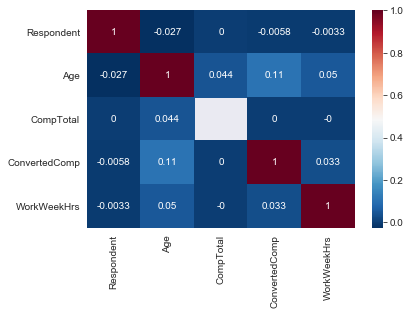

In [8]:
sns.heatmap(data.corr(), cmap='RdBu_r', annot=True)
plt.show()

# Part 2: Data Cleaning and feature engineering<a class="anchor" id="cleaning"></a>

### Developer types<a class="anchor" id="devtypes"></a>

Getting a list of all the developer types

In [9]:
from collections import Counter

In [10]:
def unlock_devtypes(df, column):
    '''
    INPUT:
    df - the pandas dataframe with the devtypes you want to expand
    column - the column containing lists of devtypes per respondent
    
    OUTPUT:
    unique_types_list - A python list of only the unique DevTypes
    '''
    respondent_lists = df[column].str.split(';', expand=True).values.tolist()
    flat_lists = list(pd.core.common.flatten(respondent_lists))
    type_count_dict = Counter(flat_lists)
    unique_types_list = list(type_count_dict.keys())
    
    #drop None and nan
    for i in [2,3]:
        unique_types_list.pop(i)
        
    return unique_types_list

In [11]:
unique_types = unlock_devtypes(data, 'DevType')
print(unique_types)
len(unique_types)

['Developer, desktop or enterprise applications', 'Developer, full-stack', 'Developer, mobile', 'Designer', 'Developer, front-end', 'Developer, back-end', 'Developer, QA or test', 'DevOps specialist', 'Developer, game or graphics', 'Database administrator', 'Developer, embedded applications or devices', 'Engineer, data', 'Educator', 'System administrator', 'Engineering manager', 'Product manager', 'Data or business analyst', 'Academic researcher', 'Data scientist or machine learning specialist', 'Scientist', 'Senior executive/VP', 'Engineer, site reliability', 'Marketing or sales professional']


23

In [12]:
# Now we will add columns for each Devtype that show if a respondent chose that devtype as part of their work skills
# Each devtype column will be filled with 1 if the respondent chose it and zero if otherwise
# We will also add a Total-types column to sum up the devtypes that a respondent chose

def create_devtype_columns(df, dev_list, column):
    '''
    INPUT:
    df - the pandas dataframe you want to modify and add the DevType columns
    dev_list - A python list of unique devtypes that will each be added as a column
    column - The DevType column containing a list of developer types per respondent
    
    OUTPUT:
    df - A modified dataframe with added columns of the unique developer types
    '''
    
    #Loop through the list of unique devtypes
    for i in range(0, len(dev_list)):
        new_col = dev_list[i]    #Save this list-value as a string in new_col variable
        df[new_col] = 0          #create a new column and fill it with zeros
        
        # for every row, replace the column value with 1 if this type is present in 'DevType' column
        df.loc[df[column].str.contains(new_col, na=False), new_col] = 1 
        
    #create a new column called 'total_types'
    #sum up all the 1s in the new columns created above to get how many dev types each person works with
    df['total_types'] = df[dev_list].sum(axis=1)
    
    return df

In [13]:
data = create_devtype_columns(data, unique_types, 'DevType')

### Age<a class="anchor" id="age"></a>
Remove rows without Age data

In [14]:
# To answer our business questions, we will work with age and years-coded columns.
# We therefore need to drop rows where the values in these columns are missing.

def drop_missing(df, subset_list):
    '''
    INPUT:
    df - the pandas dataframe from which you want to remove missing values
    subset_list - A list of columns that determine the rows from whish to drop missing values.
    
    OUTPUT:
    df - a modified dataframe with no missing values in the subset_list columns
    '''
    df = df.dropna(subset = subset_list)
    return df

dropping_subset = ['Age', 'Age1stCode', 'YearsCode']
data = drop_missing(data, dropping_subset)

Clean Age column. Remove values over 75 and under 10

In [15]:
data = data[(data['Age'] < 75) & (data['Age'] > 10)]

### Years and age of active Coding<a class="anchor" id="years"></a>

Replace string values with numbers and change column types to a float

In [16]:
# Now we will change some 'age' and years' columns into numerical features
# Currently they are categorical because some values appear as strings
# We will replace these string values with numbers
# then convert the whole column into a numeric feature using the Series .astype(float) method

data['YearsCode'] = data['YearsCode'].replace(['Less than 1 year', 'More than 50 years'], [0.5, 50.5]).astype(float)
data['YearsCodePro'] = data['YearsCodePro'].replace(['Less than 1 year', 'More than 50 years'], [0.5, 50.5]).astype(float)
data['Age1stCode'] = data['Age1stCode'].replace(['Younger than 5 years', 'Older than 85'], [4.5, 85.5]).astype(float)

Engineer new features; years it took to turn pro, and age when the person started actively coding

In [17]:
# Here we will create new features
# years_to_pro is the difference between total years coded(including school) and years working professionally (As a job)
# It is the years it took to learn to code and get a job as a developer

# age_active_code in the difference between a respondent's current age, and the years they have been actively coding
# this is the age a person was whent they began actively coding, for example in a school

data['years_to_pro'] = np.abs(data['YearsCode'] - data['YearsCodePro'])
data['age_active_code'] = (data['Age'] - data['YearsCode'])

Remove the rows where the respondent started coding at less than 5 years

In [18]:
# Here we remove the respondents that started actively coding under the age of 5 years
# I removed these rows because they seemed inconsitent with other age features and could have been data entry errors

data = data[data['age_active_code'] > 5]

Create column for age group of active coding

In [19]:
# Here, I separated the feature 'age_active_code' into different age groups
# I saved these agegroups into a new column called 'began_dev_agegroup'

data['began_dev_agegroup'] = ''
data.loc[(data['age_active_code'] < 20), 'began_dev_agegroup'] = 'below 20'
data.loc[(data['age_active_code'] >=20) & (data['age_active_code'] < 30), 'began_dev_agegroup'] = 'In my 20s'
data.loc[(data['age_active_code'] >=30) & (data['age_active_code'] < 40), 'began_dev_agegroup'] = 'In my 30s'
data.loc[(data['age_active_code'] >=40) & (data['age_active_code'] < 50), 'began_dev_agegroup'] = 'In my 40s'
data.loc[(data['age_active_code'] >=50), 'began_dev_agegroup'] = 'In my 50s'

### Country and region<a class="anchor" id="country"></a>
Create 'region' column by mapping countries to their corresponding region

In [21]:
# Here, we read a csv file that contains countries and their regions
# We save these country-region pairs into a python dictionary
# We create a  new column called 'region'
# We use the 'map' function to get the regions per country and save into the 'regions' feature

def countries_to_regions(file):
     '''
    INPUT:
    file - A csv file containing a 'country'-'region' pair. 
           This contains all countries and the Geographical regions they belong to.
    
    OUTPUT:
    region_map - a python dictionary where the key is a 'country' and value is 'region'
    '''
    df = pd.read_csv(file, index_col=0)
    region_map = list(df.to_dict().values())[0]
    return region_map

regions_map = countries_to_regions('countries regions2.csv')
data['region'] = data['Country'].map(regions_map)

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 15)

### Gender<a class="anchor" id="gender"></a>

In [ ]:
data['Gender'].value_counts()

Leave all Gender values that are nan, female or male, and change all the others to to non-conforming

In [ ]:
data.loc[                          #Find all rows where the following 'Gender' conditions are met..
    (data['Gender'] != 'Man') &    #Condition 1 - not a Man
    (data['Gender'] != 'Woman') &  #Condition 2 - not a Woman
    (data['Gender'].notna()),      #Condition 3 - not Missing
    'Gender'] = 'non-conforming'   #Replace these 'Gender' Values with 'non-conforming'

### Started_over_30<a class="anchor" id="over30"></a>
Create a new column and fill with 'Yes' if person began coding over the age of 30 years and 'No' if not

In [ ]:
# For our business questions, we need to separate our dataframe into 2:
# Those who learned coding when young and those who started when abit older
# We therefore create a new column
# where we store 'Yes' if the person learned coding when above 30 years of age,
# and 'No' if the person learned to code when below 30 years

data['started_over_30'] = ''
data.loc[(data['age_active_code'] < 30), 'started_over_30'] = 'No'
data.loc[(data['age_active_code'] >= 30), 'started_over_30'] = 'Yes'

# Part 3: Business Understanding<a class="anchor" id="biz"></a>

## Question 1. Are you too old to learn to code<a class="anchor" id="q1"></a>

In [ ]:
sns.set_palette('icefire')

sns.countplot(y = 'began_dev_agegroup', data=data, order=['below 20','In my 20s', "In my 30s", "In my 40s", 'Over 50'])
plt.ylabel('')
plt.yticks(FontSize=14)
plt.xticks(FontSize=14)
plt.xlabel('Number of Respondents', FontSize=14)
plt.title('When did you Learn to Code?', FontSize=16, fontweight='bold')
plt.show()

In [ ]:
data['began_dev_agegroup'].value_counts(normalize=True)

## Question 2: What factors contribute to starting late to code?<a class="anchor" id="q2"></a>

### Geographic location

In [ ]:
sns.set_palette('bright')

g = sns.catplot(x = 'region', kind='count', col = 'started_over_30', data=data, sharey=False)
g.set_xticklabels(rotation=45, horizontalalignment='right', fontweight='light',fontsize='large' )
g.fig.suptitle('Region', y=1.03, ha='center', fontsize='16', fontweight='bold')
g.set_xlabels('')
g.set_ylabels('Number of respondents')
g.set_titles("Started coding when over 30: {col_name}", size=12,fontweight='bold')
plt.show()

### Gender

In [ ]:
sns.set_palette(['blue', 'red', 'green'])

g = sns.catplot(x = 'Gender', kind='count', col = 'started_over_30', data=data, sharey=False)
g.set_xticklabels(rotation=0, horizontalalignment='center', fontweight='light', fontsize='large' )
g.fig.suptitle('Gender', y=1.03, ha='center', fontsize='14', fontweight='bold')
g.set_xlabels('')
g.set_ylabels('Number of respondents', fontsize='12')
g.set_titles("Started coding when over 30: {col_name}", size=12,fontweight='bold')
plt.show()

Gender distribution

In [ ]:
data['Gender'].value_counts(normalize=True)

Distribution of 'age of writing first code' by gender

In [ ]:
data.groupby('Gender')['Age1stCode'].mean()

### Education level

In [ ]:
g = sns.catplot(y = 'EdLevel', kind='count', row = 'started_over_30', data=data, sharex=False, height=4, aspect=2.5)
g.set_yticklabels( horizontalalignment='right',fontweight='light',fontsize=11)
g.set_xlabels('Number of respondents',fontweight='light',fontsize=10 )
g.set_ylabels('',fontweight='light',size=12)
g.fig.suptitle('Education Level', y=1.05, ha='center', fontsize='18', fontweight='bold')
g.set_titles("Started coding when over 30: {row_name}", size=12,fontweight='bold')
g.fig.subplots_adjust( hspace=0.2)
plt.show()

### Undergraduate major

In [ ]:
g = sns.catplot(y = 'UndergradMajor', kind='count', row = 'started_over_30', data=data, sharex=False,height=4,aspect=2.5)
g.set_yticklabels( horizontalalignment='right',fontweight='light',fontsize=12 )
g.set_xlabels('Number of respondents',fontweight='light',fontsize=10 )
g.set_ylabels('',fontweight='light',size=12)
g.fig.suptitle('Undergraduate Major', y=1.04, ha='center', fontsize='16',fontweight='bold')
g.set_titles("Started coding when over 30: {row_name}", size=12,fontweight='bold')
g.fig.subplots_adjust( hspace=0.16)
plt.show()

Percentage proportion of Undergrad majors for those who started actively coding under 30 years

In [ ]:
data[data['started_over_30'] == 'No']['UndergradMajor'].value_counts(normalize=True)

Percentage proportion of Undergrad majors for those who started actively coding over 30 years

In [ ]:
data[data['started_over_30'] == 'Yes']['UndergradMajor'].value_counts(normalize=True)

## Question 3: What are the subtle or obvious consequences common with late adopters of the coding lifestyle?<a class="anchor" id="q3"></a>

### Main branch / Current occupation

In [ ]:
g = sns.catplot(y = 'MainBranch', kind='count', row = 'started_over_30', data=data, sharex=False,height=2,aspect=4.5)
g.set_yticklabels( horizontalalignment='right',fontweight='light',fontsize=12 )
g.set_xlabels('Number of respondents',fontweight='light',fontsize=10 )
g.set_ylabels('',fontweight='light',size=12)
g.fig.suptitle('Current Occupation', y=1.04, ha='center', fontsize='16',fontweight='bold')
g.set_titles("Started coding when over 30: {row_name}", size=12,fontweight='bold')
g.fig.subplots_adjust( hspace=0.4)
plt.show()

In [ ]:
data['MainBranch'].value_counts(normalize=True)

### Total skills acquired

In [ ]:
sns.set_palette(['#2ecc71','#e74c3c'])

g = sns.catplot(y = 'total_types', x= 'started_over_30', kind='box', data=data)
g.set_xticklabels(rotation=0, fontweight='bold', fontsize=16 )
g.set_yticklabels(fontweight='light', fontsize='large' )
g.set_xlabels('Did you Start coding when over 30?', fontweight='bold', fontsize=14)
g.set_ylabels('Total developer skills', fontweight='bold',fontsize=14)
plt.show()

Developer total_types for 75th percentile of early coders vs late coders

In [ ]:
data.groupby('started_over_30')['total_types'].apply(lambda x: np.percentile(x, 75))

### Types of skills acquired

Distribution of skills in the dataset

In [ ]:
data[unique_types].sum(axis=0)

Distribution of the skills among the 2 groups

In [ ]:
skills_under_30 = data[data['started_over_30']=='No'][unique_types].sum(axis=0).sort_values(ascending=False)
skills_over_30 = data[data['started_over_30']=='Yes'][unique_types].sum(axis=0).sort_values(ascending=False)

In [ ]:
plt.figure(figsize=(9,6))
sns.barplot(y = skills_under_30.index, x = skills_under_30.values)
plt.xticks(fontsize=12)
plt.yticks(fontsize=13, fontweight='bold')
plt.title('Developer skills: Started coding under the age of 30', fontsize=16, fontweight='bold', loc='center')
plt.xlabel('Number of early coders', fontsize=12, fontweight='bold')
plt.show()

In [ ]:
plt.figure(figsize=(9,6))
sns.barplot(y = skills_over_30.index, x = skills_over_30.values, order = list(skills_under_30.index))
plt.xticks(fontsize=12)
plt.yticks(fontsize=13, fontweight='bold')
plt.title('Developer skills: Started coding after 30 years', fontsize=16, fontweight='bold', loc='center')
plt.xlabel('Number of late coders', fontsize=12, fontweight='bold')
plt.show()

Correlation of the 'age_active_coding' with skill types. This shows which skills are more likely depending on the age when the person started coding.

In [ ]:
def get_correlations_df(df, column):
    '''
    INPUT:
    df - A python dataframe containing the columns we need for correlations 
    column - The column for which we need to get its correlation coefficients with other features
    
    OUTPUT:
    corrs_df - a dataframe with 2 columns; features and coefficients
    '''
    corrs = df.corr()                        # All coefficients
    column_corrs = corrs[column]             # coeffs for just 1 column
    sorted_corrs = column_corrs.sort_values()# sorted from lease
    frame = {'Feature': sorted_corrs.index, 'Correlation': sorted_corrs.values} #A dictionary of feature and their correlations
    corrs_df = pd.DataFrame(frame)           #create a dataframe from this dictionary
    corrs_df = corrs_df[corrs_df['Feature'] != column] #remove the correlation with itself, which is always 1
    return corrs_df

age_active_corrs = get_correlations_df(data, 'age_active_code')

#Remove correlations that are naturally highly correlated with age_active_code
age_active_corrs = age_active_corrs[
    (age_active_corrs['Feature'] != 'Age') & 
    (age_active_corrs['Feature'] != 'Age1stCode')]

In [ ]:
def plot_diverging_barplots(df, title):
    '''
    INPUT:
    df - A python dataframe with the features and their correlations
    title - The title for the plot containing diverging barplots
    
    OUTPUT:
    Displays the plot
    '''
    # Prepare Data
    x = df.loc[:, ['Feature']]
    df['colors'] = ['red' if x < 0 else 'green' for x in df['Correlation']]

    # Draw plot
    plt.figure(figsize=(10,8), dpi= 80)
    plt.hlines(y=df['Feature'], xmin=0, xmax=df['Correlation'], color=df.colors, alpha=0.4, linewidth=5)

    # Decorations
    plt.gca().set(ylabel='$Feature$', xlabel='$Correlation$')
    plt.yticks(df.index, df['Feature'], fontsize=12)
    plt.title(title, fontdict={'size':20})
    plt.grid(linestyle='-', alpha=0.5)
    plt.show()
    
plot_diverging_barplots(age_active_corrs, 'Correlation of "Age when began serious coding" with \nother features')

We see positive correlations with data analysts, marketers and front-end developers. Therefore as age of active coding increases, these professions are more likely.

In [ ]:
# years_code_corrs = get_correlations_df(data, 'YearsCode')
# plot_diverging_barplots(years_code_corrs, 'Correlation of "Years Coded" with other features')

In [ ]:
# years_code_pro_corrs = get_correlations_df(data, 'YearsCodePro')
# plot_diverging_barplots(years_code_pro_corrs, 'Correlation of "Years Coded Pro" with other features')

In [ ]:
# total_types_corrs = get_correlations_df(data, 'total_types')
# plot_diverging_barplots(total_types_corrs, 'Correlation of "Total Skills acquired" with other features')

### Job Satisfaction

In [ ]:
sns.set_palette('bright')

order_vals = ['Very satisfied', 'Slightly satisfied','Neither satisfied nor dissatisfied',
                        'Slightly dissatisfied','Very dissatisfied' ]

g = sns.catplot(x = 'JobSat', kind='count', col = 'started_over_30', data=data, sharey=False, order= order_vals)
g.set_xticklabels(rotation=45, horizontalalignment='right',fontweight='light',fontsize=14 )
g.set_yticklabels(fontweight='light',fontsize=12)
g.fig.suptitle('Job Satisfaction', y=1.05, ha='center', fontsize='18', fontweight='bold')
g.set_xlabels('')
g.set_ylabels('Number of respondents',fontsize='16', fontweight='bold')
g.set_titles("Started coding when over 30: {col_name}", size=14,fontweight='bold')
g.fig.subplots_adjust( wspace=0.3)
plt.show()

### Years to professional developer

Percentage of respondent who answered this survey question

In [ ]:
data['years_to_pro'].notnull().mean()

In [ ]:
sns.set_palette(['#2ecc71','#e74c3c'])

g = sns.catplot(y = 'years_to_pro', x= 'started_over_30', kind='box', data=data)
g.set_xticklabels(rotation=0,fontweight='bold',fontsize=16 )
g.set_yticklabels(fontweight='light', fontsize='large' )
g.set_xlabels('Did you Start coding when over 30?', fontweight='bold', fontsize=14)
g.set_ylabels('Years it took to become a Pro', fontweight='bold',fontsize=14)
plt.show()

Average number of years it takes for each group to become a professional developer

In [ ]:
data.groupby('started_over_30')['years_to_pro'].mean()

### Salary distribution

In [ ]:
g = sns.catplot(y = 'ConvertedComp', x= 'started_over_30', kind='box', data=data)
g.set_xticklabels(rotation=0,fontweight='bold',fontsize=16 )
g.set_yticklabels(fontweight='light', fontsize='large' )
g.set_xlabels('Did you Start coding when over 30?', fontweight='bold', fontsize=14)
g.set_ylabels('Annual Salary Converted to USD', fontweight='bold',fontsize=16)
plt.show()

Average annual salary per group

In [ ]:
data.groupby('started_over_30')['ConvertedComp'].mean()